In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [43]:
def preprocess_data(input_file, output_file):
    # Load dữ liệu
    data = pd.read_excel(input_file, sheet_name='ketquaCLN')
    data = data.dropna()
    data = data.drop(columns=["Unnamed: 0"], axis=1)
    # data.fillna(data.mean(), inplace=True)  
    
    # Chuẩn hóa dữ liệu số liệu
    scaler = MinMaxScaler()
    numerical_columns = ['Nhiệt độ', 'pH', 'Độ dẫn', 'Độ đục', 'Ôxy hòa tan (DO)', 'COD', 
                         'BOD5 (20°C)', 'Amoni (NH4+ tính theo N)', 'Nitrit (NO2- tính theo N)',
                         'Nitrat (NO3- tính theo N)', 'Phosphat (PO43- tính theo P)', 'Tổng chất rắn lơ lửng (TSS)', 'Coliform', 'TDS']
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

    # Mã hóa cột phân loại
    label_encoder = LabelEncoder()
    
    # Encode các cột categorical
    categorical_columns = ['tenDiaDiem', 'maDiaDiem', 'Vitri', 'Ngày đo đạc']
    
    for col in categorical_columns:
        data[col] = label_encoder.fit_transform(data[col].astype(str)) 

    # Lưu dữ liệu đã xử lý vào CSV
    data.to_csv(output_file, index=False)
    print(f"Dữ liệu đã xử lý được lưu vào: {output_file}")
    return data

In [44]:
input_file = 'E:\WorkSpace\Research\ChuTuan\dulieuCLN_SongNhue_2024.xlsx'
output_file = 'E:\WorkSpace\Research\ChuTuan\dulieuCLN_SongNhue_2024.csv'

new_data = preprocess_data(input_file, output_file)
correlation_matrix = new_data.corr()

new_data

Dữ liệu đã xử lý được lưu vào: E:\WorkSpace\Research\ChuTuan\dulieuCLN_SongNhue_2024.csv


,tenDiaDiem,maDiaDiem,Vitri,Ngày đo đạc,Nhiệt độ,pH,Độ dẫn,Độ đục,Ôxy hòa tan (DO),COD,BOD5 (20°C),Amoni (NH4+ tính theo N),Nitrit (NO2- tính theo N),Nitrat (NO3- tính theo N),Phosphat (PO43- tính theo P),Tổng chất rắn lơ lửng (TSS),Coliform,WQI,TDS
0,2,0,9,0,0.656051,0.356164,0.659864,0.124642,0.039088,0.627401,0.611888,0.671972,0.000000,0.226207,0.247335,0.170213,0.619048,25,0.833333
1,0,1,9,0,0.659236,0.287671,0.783968,0.091691,0.024430,0.722151,0.695804,0.904863,0.002907,0.186670,0.139232,0.212766,0.619048,25,0.833333
2,20,2,9,0,0.671975,0.184932,0.811546,0.213467,0.008143,0.948784,0.961538,1.000000,0.002907,0.336408,0.173774,0.319149,0.619048,24,0.833333
3,8,3,9,0,0.710191,0.465753,0.784887,0.121777,0.026059,0.866837,0.819930,0.839258,0.002907,0.229094,0.219616,0.255319,0.619048,25,0.833333
4,1,4,9,1,0.707006,0.390411,0.734326,0.077364,0.099349,0.809219,0.783217,0.652299,0.002907,0.271392,0.232409,0.531915,0.476190,25,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,5,14,3,15,0.888535,0.479452,0.485199,0.309456,0.819218,0.440461,0.416084,0.033463,0.665698,0.395651,0.071429,0.531915,0.238095,25,0.500000
180,9,15,5,14,0.914013,0.349315,0.635962,0.429799,0.206840,0.594110,0.520979,0.243893,0.004360,0.390003,0.167377,0.638298,0.333333,25,0.666667
181,14,20,4,14,0.818471,0.383562,0.815223,0.606017,0.174267,0.683739,0.629371,0.981956,0.002907,0.887038,0.180171,1.000000,0.666667,23,1.000000
182,17,21,10,15,0.853503,0.452055,0.387755,0.163324,0.778502,0.334187,0.316434,0.015914,0.004360,1.000000,0.103412,0.382979,0.238095,28,0.000000


# Outliers

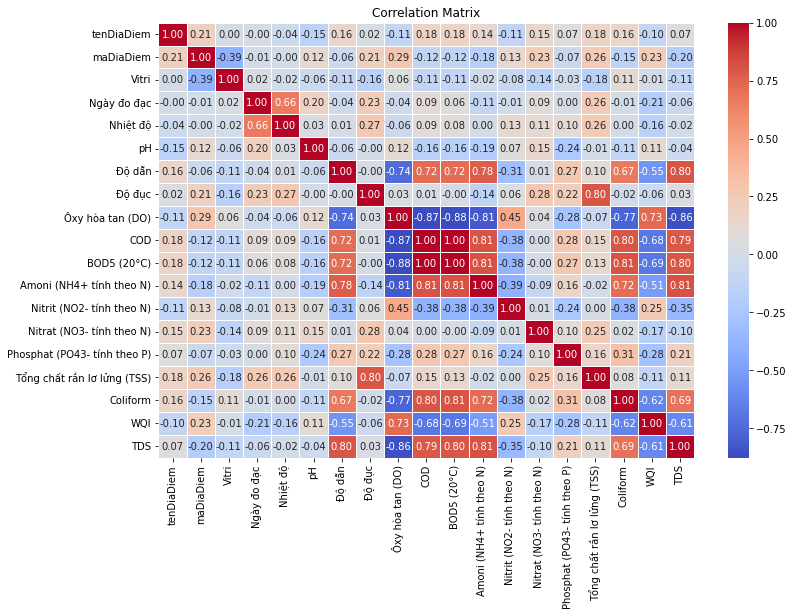

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [31]:
print(correlation_matrix['WQI'])

tenDiaDiem                     -0.101357
maDiaDiem                       0.233769
Vitri                          -0.008219
Ngày đo đạc                    -0.208927
Nhiệt độ                     -0.158237
pH                              0.107837
Độ dẫn                       -0.547240
Độ đục                         -0.057358
Ôxy hòa tan (DO)                0.733028
COD                            -0.684424
BOD5 (20°C)                    -0.686375
Amoni (NH4+ tính theo N)       -0.511973
Nitrit (NO2- tính theo N)       0.249290
Nitrat (NO3- tính theo N)      -0.166065
Phosphat (PO43- tính theo P)   -0.279712
Tổng chất rắn lơ lửng (TSS)    -0.107905
Coliform                       -0.621545
WQI                             1.000000
TDS                            -0.609951
Name: WQI, dtype: float64


Training

In [36]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [41]:
def build_model(input_dim):
    model = Sequential()
    # Lớp ẩn đầu tiên
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    # Lớp ẩn thứ hai
    model.add(Dense(32, activation='relu'))
    # Lớp đầu ra
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model
    
def train_model(model, X_train, y_train, epochs=100, batch_size=32):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)
    return history

def evaluate_model(model, X_test, y_test):
    # Dự đoán
    y_pred = model.predict(X_test)
    
    # Tính toán MSE (Mean Squared Error)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    
    # Vẽ biểu đồ so sánh dự đoán và giá trị thực
    plt.figure(figsize=(8, 6))
    plt.plot(y_test.values, label='True Values')
    plt.plot(y_pred, label='Predicted Values')
    plt.title('True vs Predicted WQI')
    plt.xlabel('Sample Index')
    plt.ylabel('WQI')
    plt.legend()
    plt.show()

Epoch 1/100
4/4 [==============================] - 2s 62ms/step - loss: 589.5907 - val_loss: 435.5848
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 528.7659 - val_loss: 373.4572
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 470.6493 - val_loss: 313.8056
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 413.3330 - val_loss: 256.4611
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 357.3533 - val_loss: 203.0042
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 304.1487 - val_loss: 154.4007
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 252.1911 - val_loss: 112.2462
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 205.1218 - val_loss: 77.6396
Epoch 9/100
4/4 [==============================] - 0s 8ms/step - loss: 162.3040 - val_loss: 52.8049
Epoch 10/100
4/4 [==============================] - 0s 8ms/step - loss: 126.4844 - val_loss

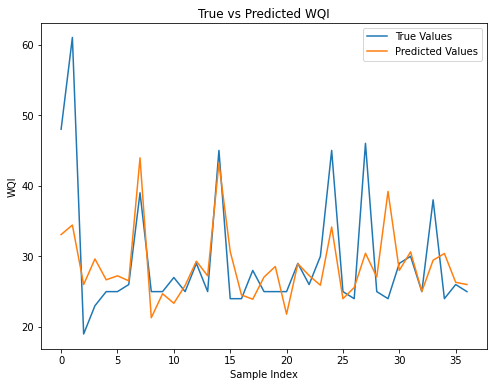

In [42]:
X = new_data.drop(columns=['WQI'])
y = new_data['WQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = build_model(X_train.shape[1])
    
# Huấn luyện mô hình
history = train_model(model, X_train, y_train, epochs=100)
    
# Đánh giá mô hình
evaluate_model(model, X_test, y_test)